# Setting up the environment and installing packages

In [1]:
# Test Python environment
print("Hello, Netflix Project!")

# Test libraries
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


Hello, Netflix Project!


2025-02-07 23:05:29.156364: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/miriamgarcia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.16.2


In [2]:
#Import useful Python packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()  # to view the first few rows of the dataset
df.info()  # to get information about data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum() #Checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Extract numeric values for 'duration' column
def clean_duration(duration):
    # If duration contains "min", extract the number before "min"
    if 'min' in str(duration):
        return int(duration.split(' ')[0])
    # If duration contains "Seasons", extract the number before "Season"
    elif 'Season' in str(duration):
        return int(duration.split(' ')[0]) * 30  # Assuming 1 season = 30 minutes average
    else:
        return None  # Return None for unrecognized formats

# Apply the function to the 'duration' column
df['duration'] = df['duration'].apply(clean_duration)

# Now we can fill missing 'duration' with the median
df['duration'].fillna(df['duration'].median(), inplace=True)


In [7]:
df['duration'].head()

0    90.0
1    60.0
2    30.0
3    30.0
4    60.0
Name: duration, dtype: float64

In [8]:
# Filling in missing values in 'director', 'cast', 'country', 'date_added' with "Unknown" or appropriate replacement
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Not Available', inplace=True)

# Fill missing 'rating' with the mode (most frequent value)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Fill missing 'duration' with the median value
df['duration'].fillna(df['duration'].median(), inplace=True)


In [9]:
df.isnull().sum() #Verifying that now the data has no null values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# Convert 'release_year' to integer
df['release_year'] = df['release_year'].astype(int)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check the data types
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration               float64
listed_in               object
description             object
dtype: object

In [11]:
#Extract month and year from date_added:
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [12]:
#Encoding rating as a categorical variable
df['rating'] = df['rating'].astype('category')

# Check the data types
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration               float64
listed_in               object
description             object
month_added            float64
year_added             float64
dtype: object

In [13]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['director', 'cast', 'country', 'rating'], drop_first=True)

# Check the new columns
df_encoded.head()

,show_id,type,title,date_added,release_year,duration,listed_in,description,month_added,year_added,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,90.0,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,...,1,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,2021-09-24,2021,60.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,...,0,0,0,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,2021-09-24,2021,30.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,...,0,0,0,0,1,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,30.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,...,0,0,0,0,1,0,0,0,0,0
4,s5,TV Show,Kota Factory,2021-09-24,2021,60.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
# Extract top 10 directors for encoding
top_directors = df['director'].value_counts().index[:10]
df['popular_director'] = df['director'].apply(lambda x: x if x in top_directors else 'Other')

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale 'duration' if needed
scaler = StandardScaler()
df_encoded['duration_scaled'] = scaler.fit_transform(df_encoded[['duration']])

# Check the scaled data
df_encoded[['duration', 'duration_scaled']].head()

,duration,duration_scaled
0,90.0,0.111378
1,60.0,-0.615919
2,30.0,-1.343215
3,30.0,-1.343215
4,60.0,-0.615919


In [16]:
print(df['duration'].head(10))  # Inspect the first 10 rows of the original data

0     90.0
1     60.0
2     30.0
3     30.0
4     60.0
5     30.0
6     91.0
7    125.0
8    270.0
9    104.0
Name: duration, dtype: float64


In [17]:
print(df['duration'].head(10))  # Check cleaned data
print(df['duration'].unique())  # Check for unexpected values
print(df['duration'].describe())  # Get statistical summary

0     90.0
1     60.0
2     30.0
3     30.0
4     60.0
5     30.0
6     91.0
7    125.0
8    270.0
9    104.0
Name: duration, dtype: float64
[ 90.  60.  30.  91. 125. 270. 104. 127. 120.  67.  94. 150. 161.  61.
 166. 147. 103.  97. 106. 111. 110. 105.  96. 124. 116.  98.  23. 115.
 122.  99.  88. 100. 180. 102.  93.  95.  85.  83. 113.  13. 182.  48.
 145.  87.  92.  80. 117. 128. 119. 143. 114. 118. 108.  63. 121. 142.
 154.  82. 109. 101.  86. 229.  76.  89. 156. 112. 107. 129. 135. 136.
 165. 133.  70.  84. 140.  78. 210.  64.  59. 139.  69. 148. 189. 141.
 130. 138.  81. 132. 300. 123.  65.  68.  66.  62.  74. 131.  39.  46.
  38. 240. 510. 126. 155. 159. 137.  12. 273.  36.  34.  77.  49.  58.
  72. 204. 212.  25.  73.  29.  47.  32.  35.  71. 149.  33.  15.  54.
 224. 162.  37.  75.  79.  55. 158. 164. 173. 181. 185.  21.  24.  51.
 151.  42.  22. 134. 177. 390.  52.  14.  53.   8.  57.  28.  50.   9.
  26.  45. 171.  27.  44. 146.  20. 157.  17. 203.  41. 194. 450. 233.
 237. 2

In [18]:
# Extract month and year from 'date_added'
df_encoded['month_added'] = df_encoded['date_added'].dt.month
df_encoded['year_added'] = df_encoded['date_added'].dt.year

# Check the new columns
print(df_encoded[['date_added', 'month_added', 'year_added']].head())


  date_added  month_added  year_added
0 2021-09-25          9.0      2021.0
1 2021-09-24          9.0      2021.0
2 2021-09-24          9.0      2021.0
3 2021-09-24          9.0      2021.0
4 2021-09-24          9.0      2021.0


In [19]:
# Check for any missing values in the dataset
print(df_encoded.isnull().sum())

# Fill any remaining missing values, for example, by using the median for numerical columns
df_encoded.fillna(df_encoded.median(), inplace=True)

show_id             0
type                0
title               0
date_added         10
release_year        0
                   ..
rating_TV-Y         0
rating_TV-Y7        0
rating_TV-Y7-FV     0
rating_UR           0
duration_scaled     0
Length: 12995, dtype: int64


/var/folders/1v/lzq6943n6q9327g_lkz22xhc0000gn/T/ipykernel_42713/2803263109.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_encoded.fillna(df_encoded.median(), inplace=True)
/var/folders/1v/lzq6943n6q9327g_lkz22xhc0000gn/T/ipykernel_42713/2803263109.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_encoded.fillna(df_encoded.median(), inplace=True)


In [20]:
# Select only numerical columns
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numerical columns only
df_encoded[numerical_cols] = df_encoded[numerical_cols].fillna(df_encoded[numerical_cols].median())

In [21]:
# Check for any remaining missing values
print(df_encoded.isnull().sum())


show_id             0
type                0
title               0
date_added         10
release_year        0
                   ..
rating_TV-Y         0
rating_TV-Y7        0
rating_TV-Y7-FV     0
rating_UR           0
duration_scaled     0
Length: 12995, dtype: int64


In [22]:
# Fill missing 'date_added' values with a default date (or 'Not Available' for placeholders)
df_encoded['date_added'].fillna('Not Available', inplace=True)

# Verify that 'date_added' no longer has missing values
print(df_encoded['date_added'].isnull().sum())

0


In [23]:
df_encoded['date_added'].fillna('2000-01-01', inplace=True)  # example date

In [24]:
# Identifying potential outliers in 'duration'
Q1 = df_encoded['duration'].quantile(0.25)
Q3 = df_encoded['duration'].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where 'duration' is an outlier (for example, beyond 1.5*IQR)
df_encoded = df_encoded[(df_encoded['duration'] >= (Q1 - 1.5 * IQR)) & 
                        (df_encoded['duration'] <= (Q3 + 1.5 * IQR))]

# Check the shape of the dataframe to see how many rows were removed
print(df_encoded.shape)

(8707, 12995)


In [25]:
# Check for duplicates
duplicates = df_encoded.duplicated().sum()

if duplicates > 0:
    print(f"Found {duplicates} duplicate rows.")
    # Drop duplicates if needed
    df_encoded = df_encoded.drop_duplicates()
else:
    print("No duplicates found.")

No duplicates found.


In [26]:
# Saving the cleaned and preprocessed data to a new CSV file
df_encoded.to_csv('/Users/miriamgarcia/Desktop/NetflixRecommendationSystem/cleaned_data.csv', index=False)

# Confirm the data was saved correctly
print("Cleaned data saved to 'cleaned_data.csv'")

Cleaned data saved to 'cleaned_data.csv'


# Exploratory Data Analysis

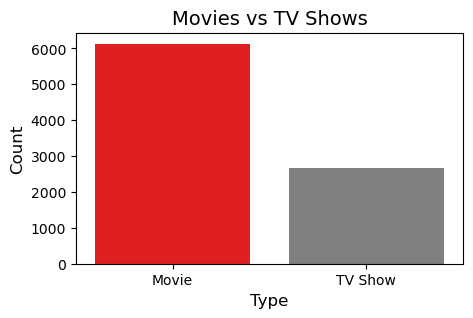

In [27]:
#Number of titles per category movies vs shows
plt.figure(figsize=(5, 3))

sns.countplot(x='type', data=df, palette=['red', 'grey'])

plt.title('Movies vs TV Shows', fontsize=14, color='black')
plt.xlabel('Type', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white') 
plt.show()

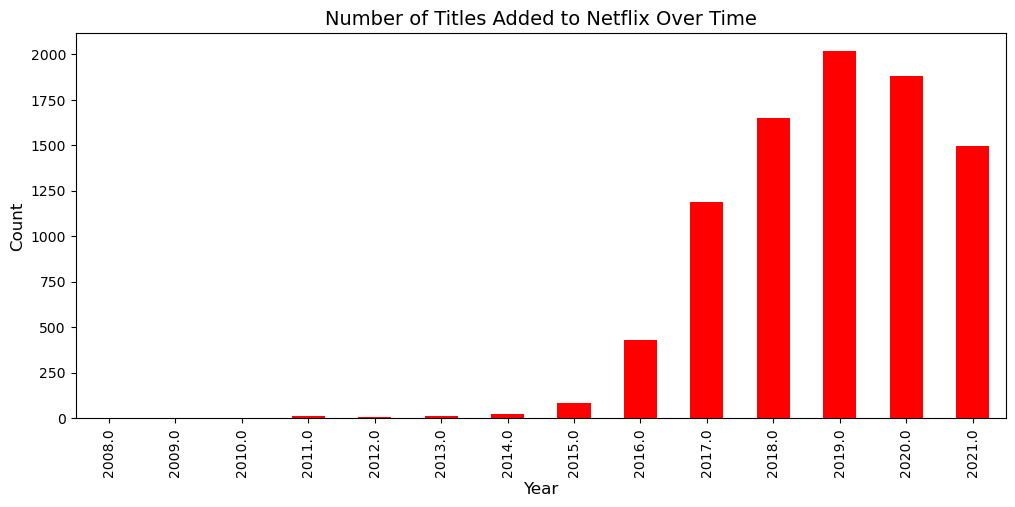

In [28]:
#Trend chart of new content added over time

df['year_added'].value_counts().sort_index().plot(
    kind='bar', 
    figsize=(12,5), 
    color='red'  
)

plt.title("Number of Titles Added to Netflix Over Time", fontsize=14, color='black')
plt.xlabel("Year", fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')

# Customize tick labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Set background color to white
plt.gca().set_facecolor('white')

# Show the plot
plt.show()


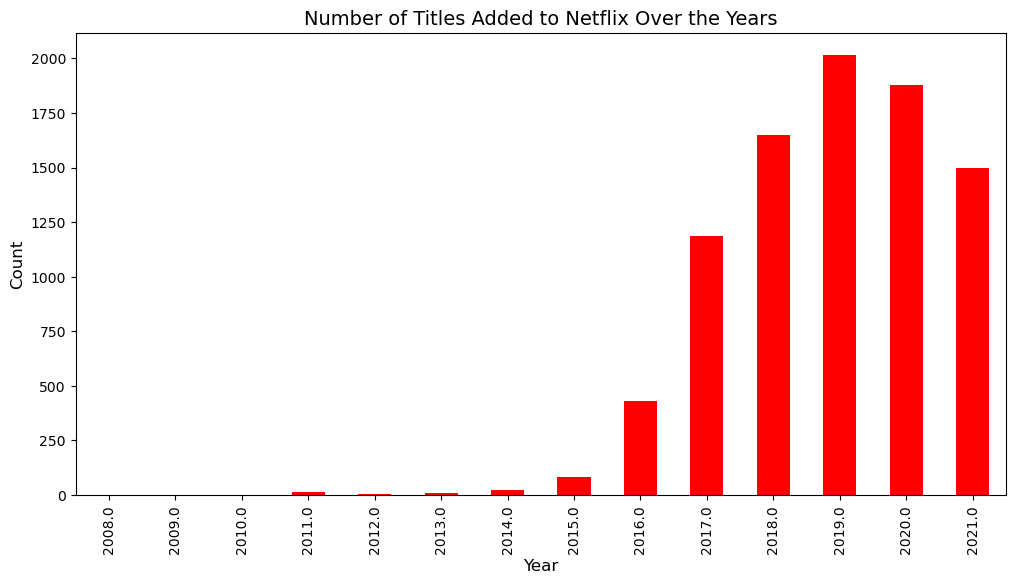

In [29]:
#Titles over the years

plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title("Number of Titles Added to Netflix Over the Years", fontsize=14, color='black')
plt.xlabel("Year", fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white')
plt.show()

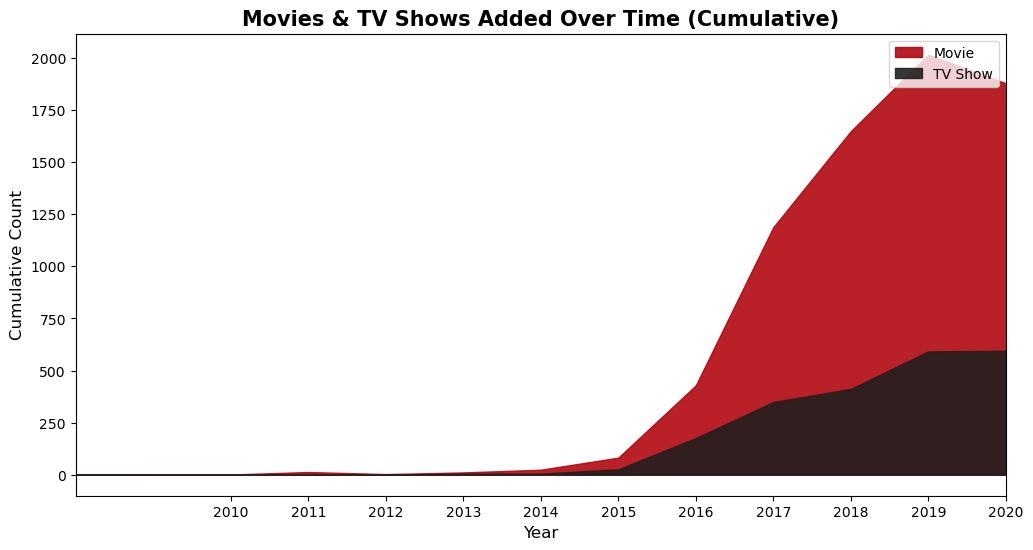

In [30]:
#Cumulative sum of movies and TV shows added over time
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

plt.figure(figsize=(12, 6))
colors = ["#b20710", "#221f1f"]

# Plotting the cumulative counts
for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    plt.fill_between(mtv_rel.index, 0, mtv_rel, color=colors[i], label=mtv, alpha=0.9)

plt.title('Movies & TV Shows Added Over Time (Cumulative)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Count', fontsize=12)

# Limit x-axis to show only the last 10 years (2008 - 2020)
plt.xlim(2008, 2020)
plt.xticks(np.arange(2010, 2021, 1))
plt.legend()
plt.show()

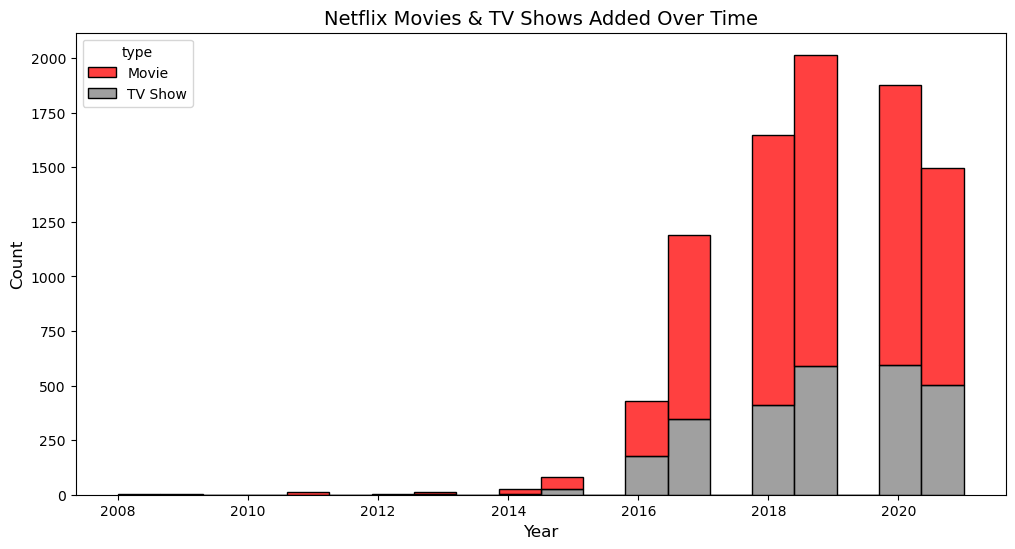

In [31]:
#Popularity of Movies vs TV Shows Over Time
plt.figure(figsize=(12,6))
sns.histplot(
    data=df, 
    x='year_added', 
    hue='type', 
    multiple="stack", 
    bins=20, 
    palette={'Movie': 'red', 'TV Show': 'grey'} 
)
plt.title("Netflix Movies & TV Shows Added Over Time", fontsize=14, color='black')
plt.xlabel("Year", fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

plt.show()

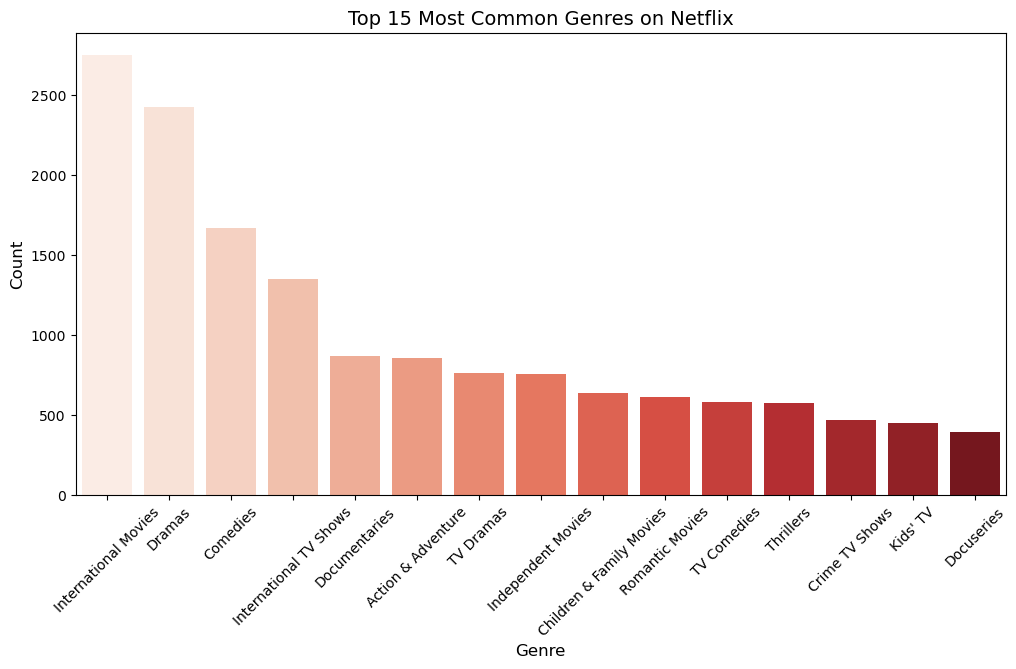

In [32]:
#Genre Analysis

# Process genres
from collections import Counter
all_genres = ', '.join(df['listed_in']).split(', ')
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_df['Genre'][:15], y=genre_df['Count'][:15], palette=sns.color_palette("Reds", 15))

plt.xticks(rotation=45, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.title("Top 15 Most Common Genres on Netflix", fontsize=14, color='black')
plt.xlabel("Genre", fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')
plt.gca().set_facecolor('white')
plt.show()

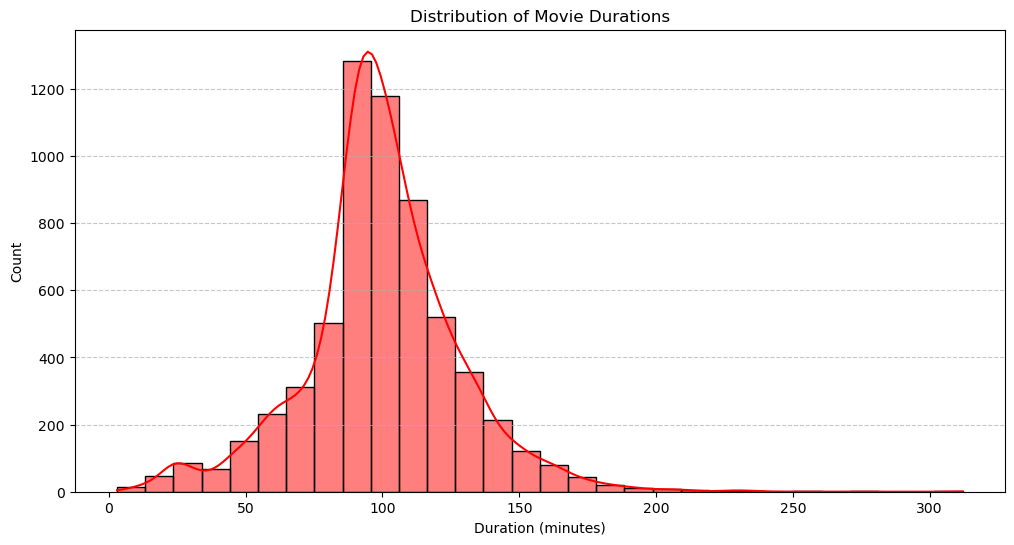

In [33]:
#Movie Length Distribution
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']=="Movie"]['duration'], bins=30, kde=True, color='red')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

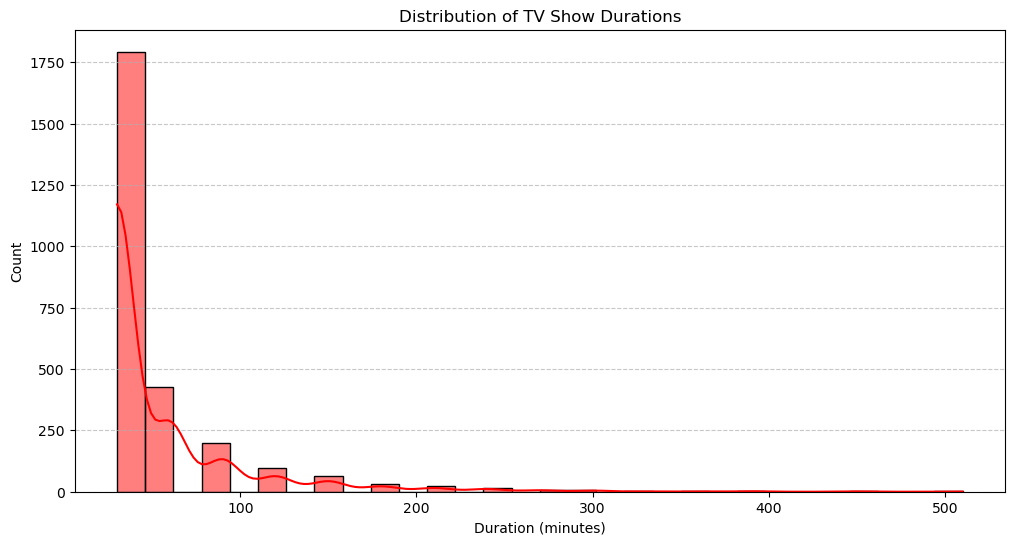

In [34]:
#TV Show Length Distribution
plt.figure(figsize=(12,6))
sns.histplot(df[df['type']=="TV Show"]['duration'], bins=30, kde=True, color='red')
plt.title("Distribution of TV Show Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

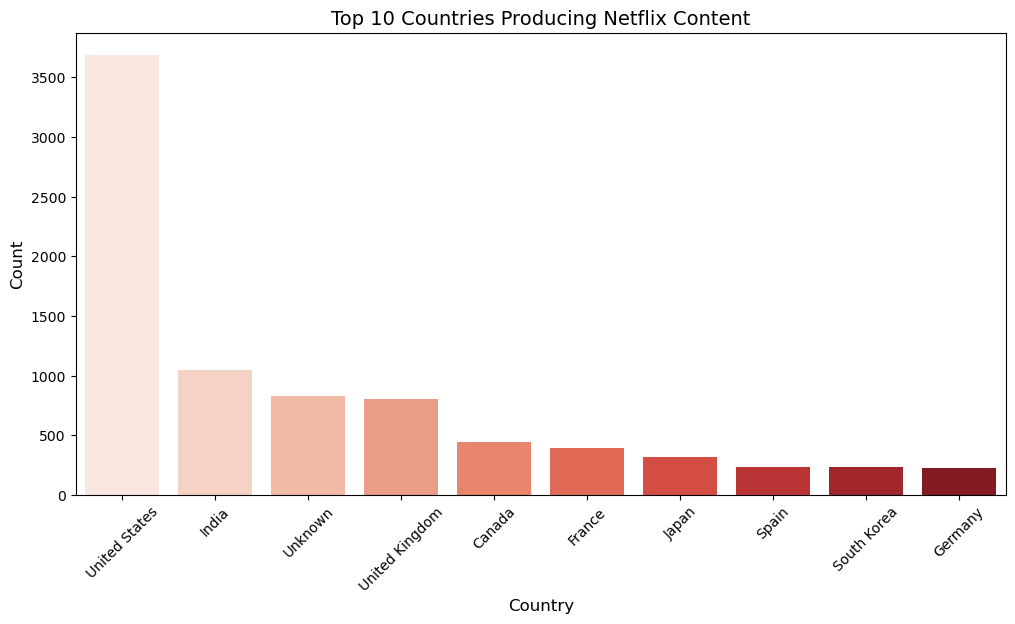

In [35]:
#Country Based Analysis

# Process country data
all_countries = ', '.join(df['country']).split(', ')
country_counts = Counter(all_countries)
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_df['Country'][:10], y=country_df['Count'][:10], palette=sns.color_palette("Reds", 10))
plt.xticks(rotation=45, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.title("Top 10 Countries Producing Netflix Content", fontsize=14, color='black')
plt.xlabel("Country", fontsize=12, color='black')
plt.ylabel("Count", fontsize=12, color='black')
plt.show()

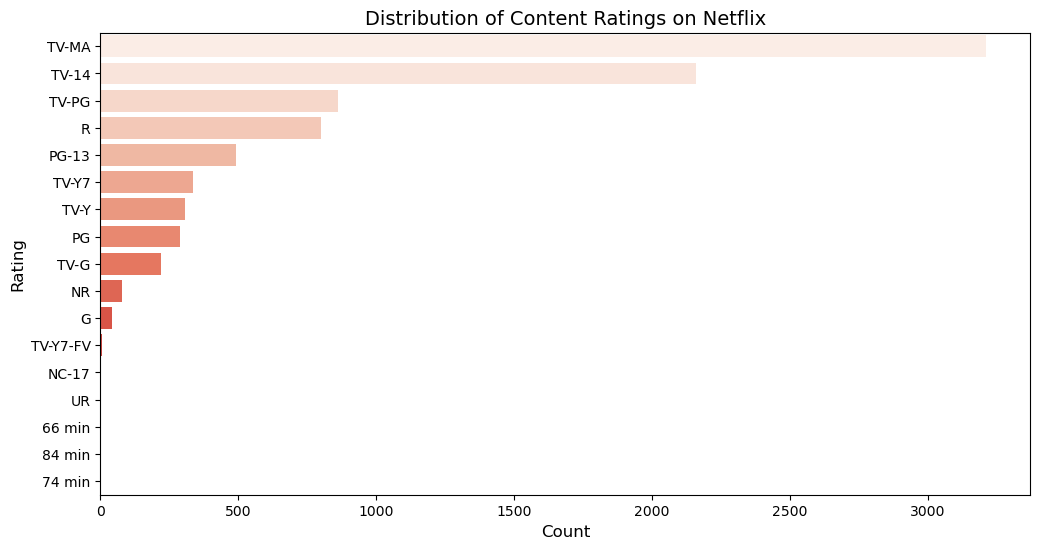

In [36]:
#Ratings Distribution

plt.figure(figsize=(12,6))
sns.countplot(
    y=df['rating'], 
    order=df['rating'].value_counts().index, 
    palette=sns.color_palette("Reds", len(df['rating'].unique()))  # Red hues
)
plt.title("Distribution of Content Ratings on Netflix", fontsize=14, color='black')
plt.xlabel("Count", fontsize=12, color='black')
plt.ylabel("Rating", fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white')
plt.show()


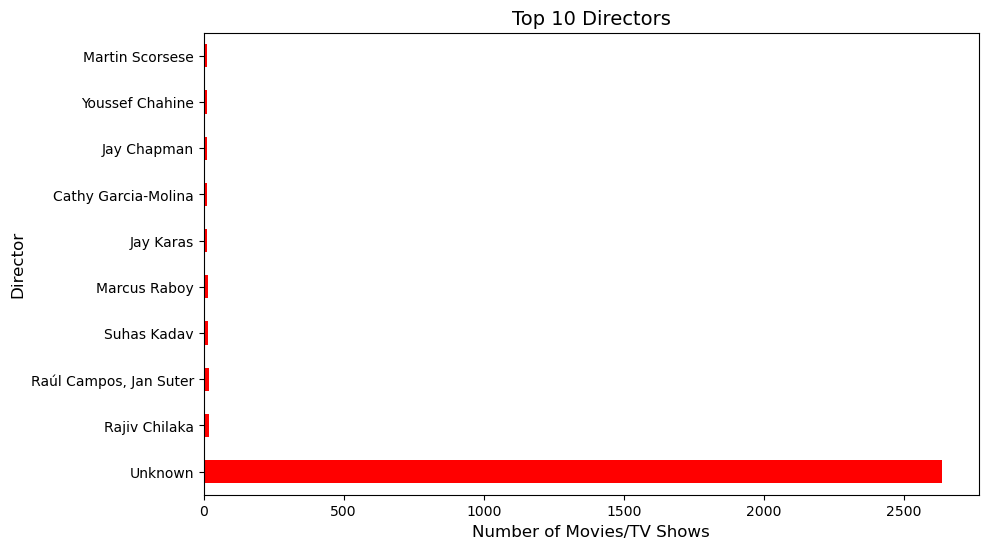

In [37]:
# Top 10 directors by count
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', figsize=(10, 6), color='red')
plt.title('Top 10 Directors', fontsize=14, color='black')
plt.xlabel('Number of Movies/TV Shows', fontsize=12, color='black')
plt.ylabel('Director', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white')  # Set background color to white
plt.show()

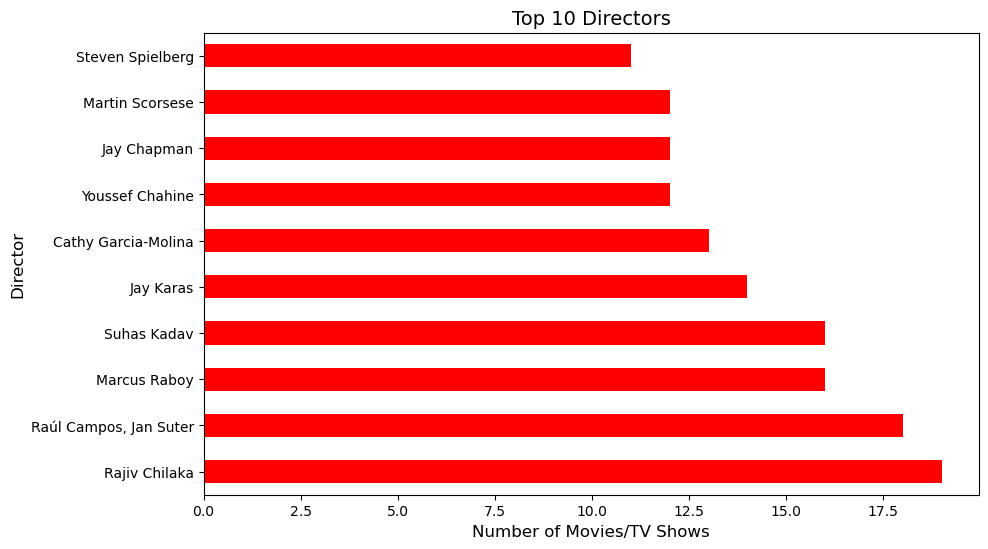

In [38]:
# Remove 'Unknown' values from the 'director' column
df_filtered = df[df['director'] != 'Unknown']

# Top 10 directors by count
top_directors = df_filtered['director'].value_counts().head(10)

# Plotting the top 10 directors
top_directors.plot(kind='barh', figsize=(10, 6), color='red')
plt.title('Top 10 Directors', fontsize=14, color='black')
plt.xlabel('Number of Movies/TV Shows', fontsize=12, color='black')
plt.ylabel('Director', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white')  # Set background color to white
plt.show()

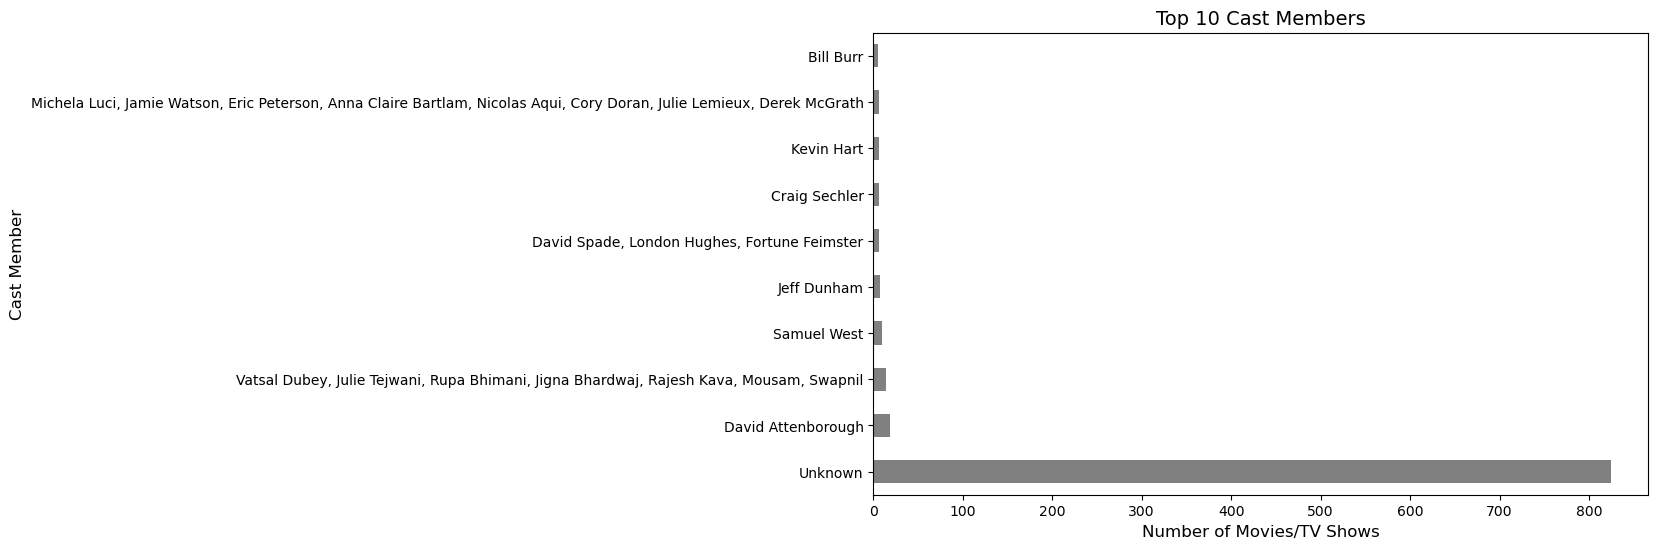

In [39]:
# Top 10 cast members by count
top_cast = df['cast'].value_counts().head(10)
top_cast.plot(kind='barh', figsize=(10, 6), color='grey')
plt.title('Top 10 Cast Members', fontsize=14, color='black')
plt.xlabel('Number of Movies/TV Shows', fontsize=12, color='black')
plt.ylabel('Cast Member', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white')  # Set background color to white
plt.show()

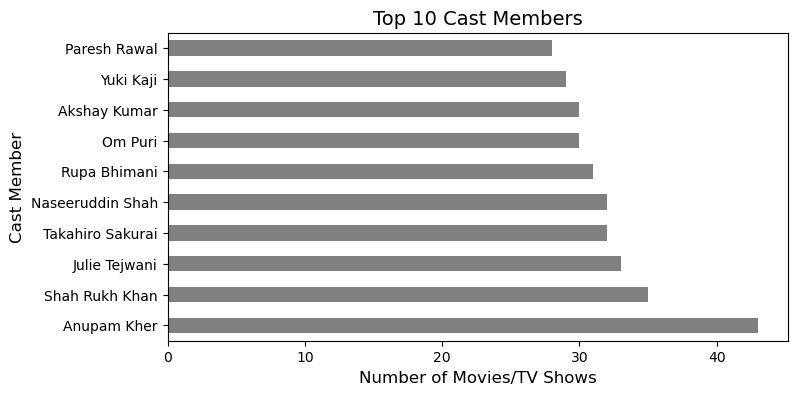

In [40]:
# Remove 'Unknown' values from the 'cast' column
df_filtered_cast = df[df['cast'] != 'Unknown']

# Split the 'cast' column entries into individual cast members
cast_list = df_filtered_cast['cast'].str.split(',').explode().str.strip()

# Count the top 10 most frequent cast members
top_cast = cast_list.value_counts().head(10)

# Plotting the top 10 cast members
top_cast.plot(kind='barh', figsize=(8, 4), color='grey')
plt.title('Top 10 Cast Members', fontsize=14, color='black')
plt.xlabel('Number of Movies/TV Shows', fontsize=12, color='black')
plt.ylabel('Cast Member', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.gca().set_facecolor('white')  # Set background color to white
plt.show()

In [41]:
# Step 1: Strip any leading/trailing whitespaces from the 'rating' column
df['rating'] = df['rating'].str.strip()

# Step 2: Filter out rows where the 'rating' column contains any values with 'min' (to avoid durations)
df_cleaned = df[~df['rating'].str.contains(r'\d+\s*min', na=False)]

# Step 3: Remove rows with 'Unknown' ratings
df_cleaned = df_cleaned[df_cleaned['rating'] != 'Unknown']

# Step 4: Only keep rows with valid ratings (based on the known ratings list)
valid_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']
df_cleaned = df_cleaned[df_cleaned['rating'].isin(valid_ratings)]

# Step 5: Check the unique ratings after cleaning
print("Unique ratings after cleaning:", df_cleaned['rating'].unique())
print("Shape of cleaned data:", df_cleaned.shape) 

Unique ratings after cleaning: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'TV-Y7-FV']
Shape of cleaned data: (8721, 15)


Unique ratings after cleaning: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'TV-Y7-FV']
Shape of cleaned data: (8721, 15)


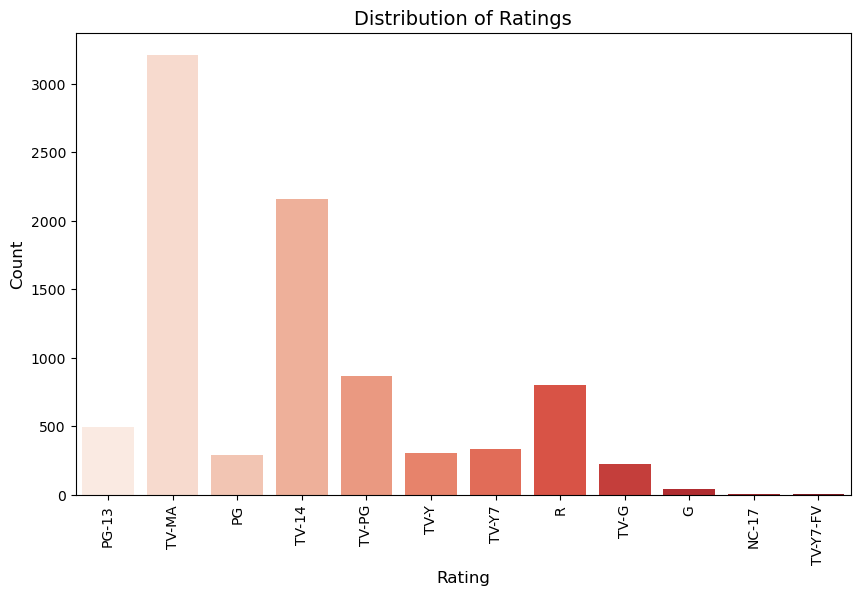

In [42]:
#With our EDA, we found that there is a problem with the Ratings variable as it is including Ratings such as "66 min" which is a duration, not a rating
#Double-check the unique ratings after cleaning
print("Unique ratings after cleaning:", df_cleaned['rating'].unique())

# Check the number of rows and make sure there are no durations or 'Unknown' ratings
print("Shape of cleaned data:", df_cleaned.shape)

# Plot the distribution of ratings (without 'Unknown' or 'min' ratings)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_cleaned, palette='Reds')
plt.title('Distribution of Ratings', fontsize=14, color='black')
plt.xlabel('Rating', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.xticks(rotation=90, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.show()

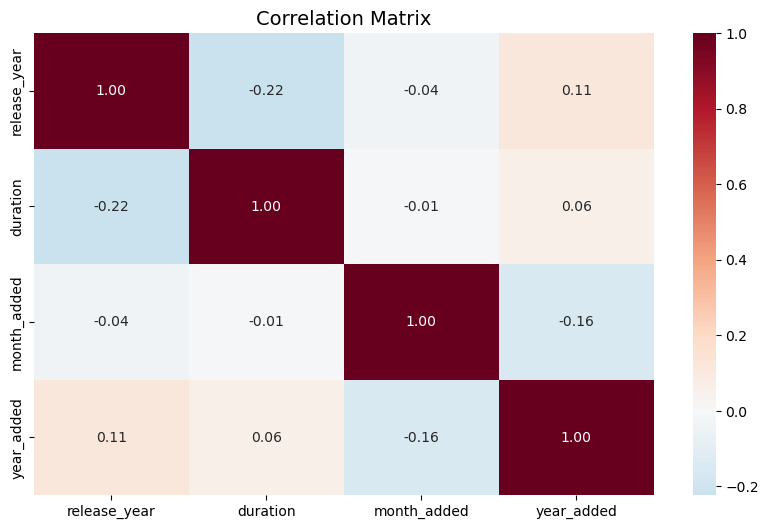

In [43]:
# Correlation matrix of numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_columns].corr()

# Plotting the correlation matrix with a dark red to white color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt='.2f', cbar=True, center=0)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

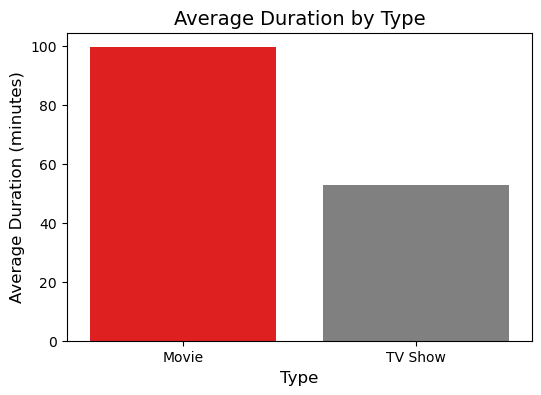

In [44]:
# Convert 'duration' to numeric if not already
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Filter out the rows with NaN in 'duration'
df_cleaned = df.dropna(subset=['duration'])

# Calculate average duration by type
avg_duration = df_cleaned.groupby('type')['duration'].mean()

# Set the colors: red for Movies, grey for TV Shows
colors = ['red' if t == 'Movie' else 'grey' for t in avg_duration.index]

# Plotting the average duration by type
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette=colors)
plt.title('Average Duration by Type', fontsize=14, color='black')
plt.xlabel('Type', fontsize=12, color='black')
plt.ylabel('Average Duration (minutes)', fontsize=12, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.show()

/Users/miriamgarcia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


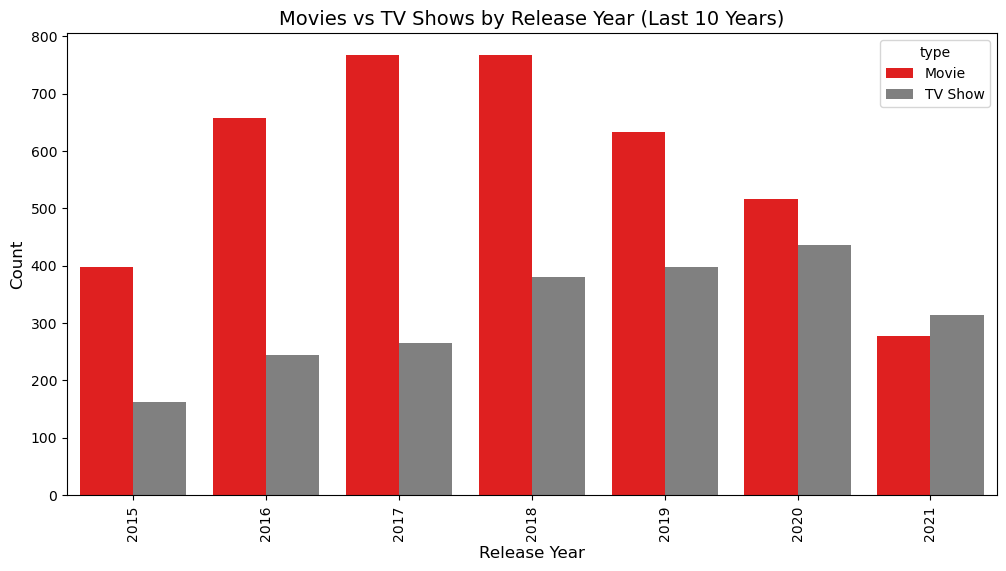

In [45]:
# Plotting the count of Movies vs TV Shows by Release Year (last 10 years)
current_year = pd.to_datetime('now').year

# Filter the data to show only the last 10 years
df_last_10_years = df[df['release_year'] >= current_year - 10]
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='type', data=df_last_10_years, palette={'Movie': 'red', 'TV Show': 'grey'})
plt.title('Movies vs TV Shows by Release Year (Last 10 Years)', fontsize=14, color='black')
plt.xlabel('Release Year', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.xticks(rotation=90, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.show()

A/B Testing Considerations

In [46]:
#Correlation between features
#plt.figure(figsize=(12,6))
#sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
#plt.title("Feature Correlation Heatmap")
#plt.show()

# Additional Dataset for accurate model building

Bringing in IMBD (movie only) ratings Data to get top rated content on Netflix

In [47]:
imdb_df = pd.read_csv('IMDbmovies.csv')
imdb_df.head()

/var/folders/1v/lzq6943n6q9327g_lkz22xhc0000gn/T/ipykernel_42713/2630546721.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_df = pd.read_csv('IMDbmovies.csv')


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [48]:
print(imdb_df.columns)

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')


In [49]:
# Check for data types and missing values
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [50]:
# Check for null values
imdb_df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [51]:
# Fill missing values for duration, 'votes','avg_vote', and 'metascore' with median values
imdb_df['duration'].fillna(imdb_df['duration'].median(), inplace=True)
imdb_df['votes'].fillna(imdb_df['votes'].median(), inplace=True)
imdb_df['avg_vote'].fillna(imdb_df['avg_vote'].median(), inplace=True)
imdb_df['metascore'].fillna(imdb_df['metascore'].median(), inplace=True)

#Fill missing description, country, language, director, production_company, writer, and actors with 'Unknown'
imdb_df['description'].fillna('Unknown', inplace=True)
imdb_df['country'].fillna('Unknown', inplace=True)
imdb_df['language'].fillna('Unknown', inplace=True)
imdb_df['director'].fillna('Unknown', inplace=True)
imdb_df['production_company'].fillna('Unknown', inplace=True)
imdb_df['actors'].fillna('Unknown', inplace=True)
imdb_df['writer'].fillna('Unknown', inplace=True)

# Fill 'reviews_from_users' and 'reviews_from_critics' with 0
imdb_df['reviews_from_users'].fillna(0, inplace=True)
imdb_df['reviews_from_critics'].fillna(0, inplace=True)

In [52]:
# Check for null values
imdb_df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                      0
language                     0
director                     0
writer                       0
production_company           0
actors                       0
description                  0
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                    0
reviews_from_users           0
reviews_from_critics         0
dtype: int64

In [53]:
# Function to clean currency strings
def clean_currency(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').strip()  # Remove dollar sign, commas, and whitespace
    try:
        return float(value)  # Convert to float
    except ValueError:  # In case of any error in conversion
        return None  # Return None if unable to convert

# Apply the cleaning function to the relevant columns
imdb_df['budget'] = imdb_df['budget'].apply(clean_currency)
imdb_df['usa_gross_income'] = imdb_df['usa_gross_income'].apply(clean_currency)
imdb_df['worlwide_gross_income'] = imdb_df['worlwide_gross_income'].apply(clean_currency)

# Now fill the missing values with the median
imdb_df['budget'].fillna(imdb_df['budget'].median(), inplace=True)
imdb_df['usa_gross_income'].fillna(imdb_df['usa_gross_income'].median(), inplace=True)
imdb_df['worlwide_gross_income'].fillna(imdb_df['worlwide_gross_income'].median(), inplace=True)

# Check for remaining nulls
print(imdb_df[['budget', 'usa_gross_income', 'worlwide_gross_income']].isnull().sum())


budget                   0
usa_gross_income         0
worlwide_gross_income    0
dtype: int64


In [54]:
# Fill missing duration, budget, usa_gross_income, and worlwide_gross_income with the median value
imdb_df['budget'].fillna(imdb_df['budget'].median(), inplace=True)
imdb_df['usa_gross_income'].fillna(imdb_df['usa_gross_income'].median(), inplace=True)
imdb_df['worlwide_gross_income'].fillna(imdb_df['worlwide_gross_income'].median(), inplace=True)

In [55]:
# Check for null values
imdb_df.isnull().sum()

imdb_title_id            0
title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                   0
description              0
avg_vote                 0
votes                    0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
metascore                0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

Merging both the Netflix and the IMDb datasets

In [56]:
# Merge IMDb dataset with Netflix dataset based on title
merged_df = pd.merge(df_encoded, imdb_df, left_on='title', right_on='title', how='inner')

# Check the merged dataset
merged_df.head()


,show_id,type,title,date_added,release_year,duration_x,listed_in,description_x,month_added,year_added,...,actors,description_y,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,s6,TV Show,Midnight Mass,2021-09-24 00:00:00,2021,30.0,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,2021.0,...,"Julia Cornish, Elizabeth Vance, Mariana Matthe...",A group of people fight for their small town a...,2.4,407,3000000.0,1315498.0,1108231.0,57.0,36.0,11.0
1,s8,Movie,Sankofa,2021-09-24 00:00:00,1993,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0,2021.0,...,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",A self-absorbed Black American fashion model o...,6.9,518,1000000.0,2198984.0,2198984.0,57.0,21.0,5.0
2,s16,TV Show,Dear White People,2021-09-22 00:00:00,2021,120.0,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9.0,2021.0,...,"Tyler James Williams, Tessa Thompson, Kyle Gal...",The lives of four black students at an Ivy Lea...,6.1,24094,3000000.0,4404154.0,4633961.0,79.0,90.0,136.0
3,s20,TV Show,Jaguar,2021-09-22 00:00:00,2021,30.0,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro...",9.0,2021.0,...,"Sadhu Kokila, Abhi, Amrutha, Avinash, Jagapath...","Krishna, a young medical student, strikes agai...",5.5,263,3000000.0,1315498.0,1108231.0,57.0,2.0,7.0
4,s25,Movie,Jeans,2021-09-21 00:00:00,1998,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9.0,2021.0,...,"Prashanth, Aishwarya Rai Bachchan, Nassar, Sen...",The father of twin brothers wants to get them ...,6.5,3178,3000000.0,1315498.0,1108231.0,57.0,14.0,4.0


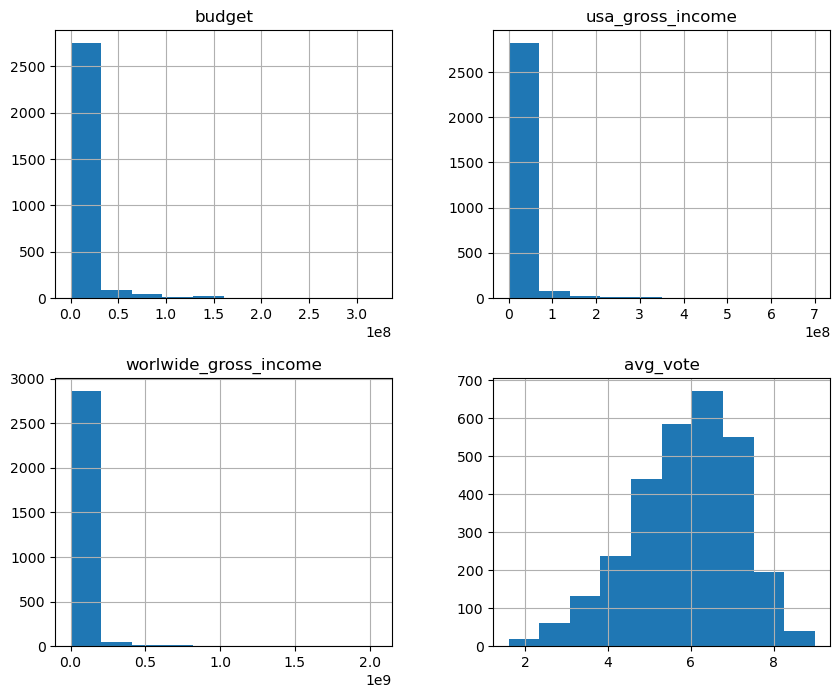

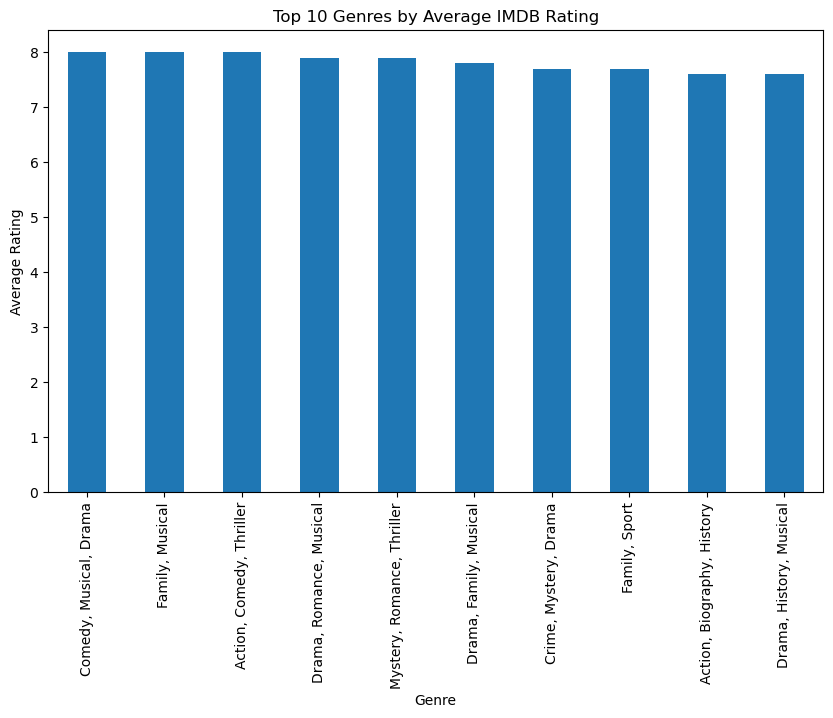

In [57]:
# Check distribution of numeric columns like budget, income, etc.
merged_df[['budget', 'usa_gross_income', 'worlwide_gross_income', 'avg_vote']].hist(figsize=(10, 8))
plt.show()

# Plotting average ratings per genre
plt.figure(figsize=(10, 6))
genre_ratings = merged_df.groupby('genre')['avg_vote'].mean().sort_values(ascending=False)
genre_ratings.head(10).plot(kind='bar')
plt.title('Top 10 Genres by Average IMDB Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


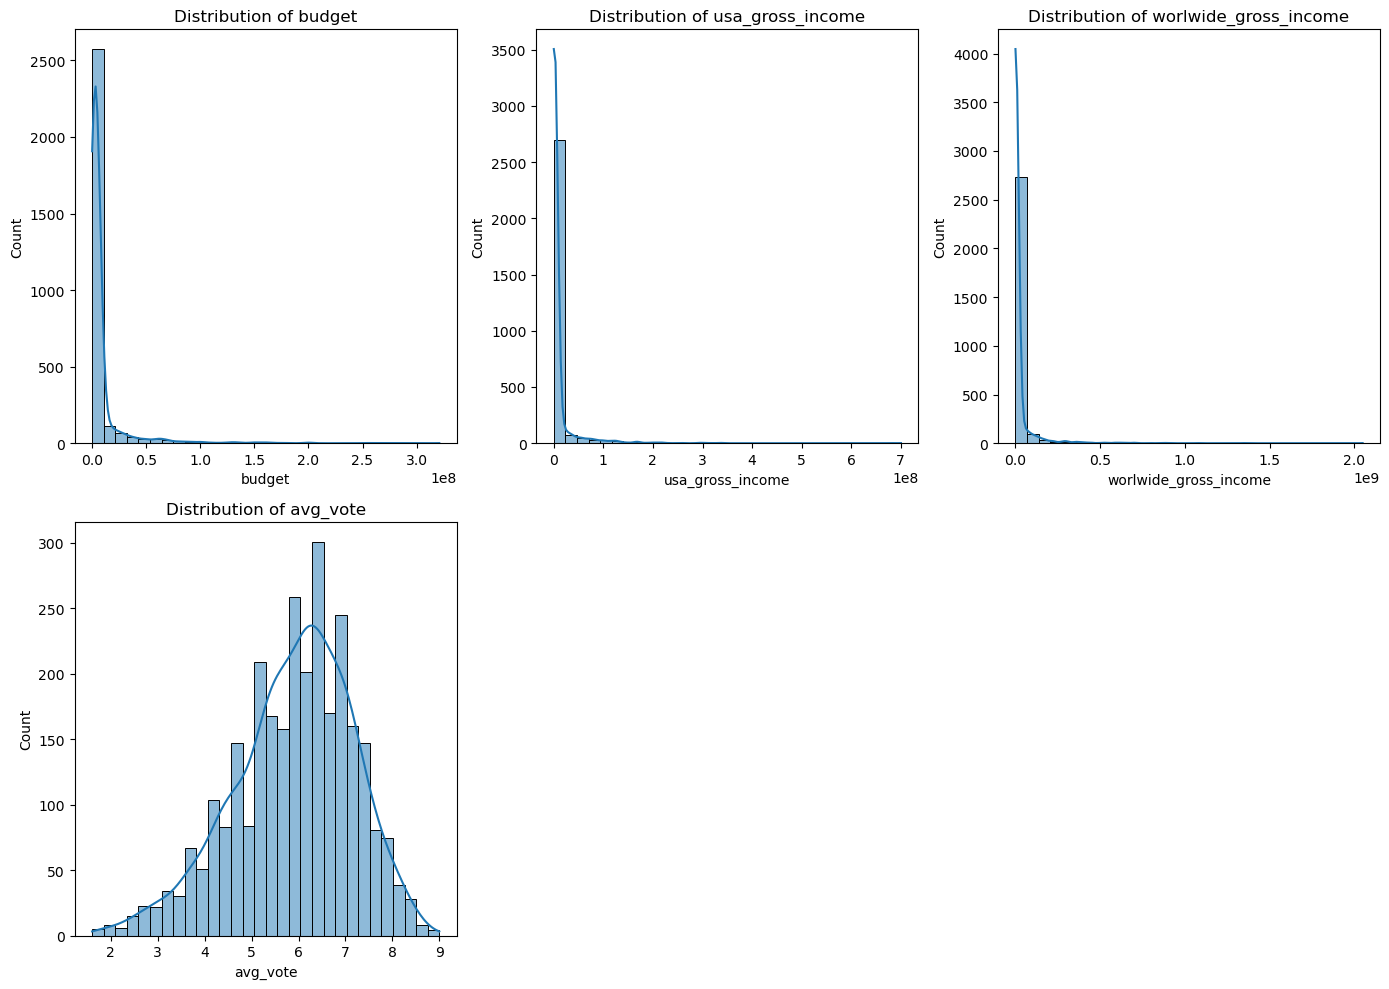

In [58]:
# List of numeric columns to explore
numeric_columns = ['budget', 'usa_gross_income', 'worlwide_gross_income', 'avg_vote']

# Plot histograms to check distributions
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

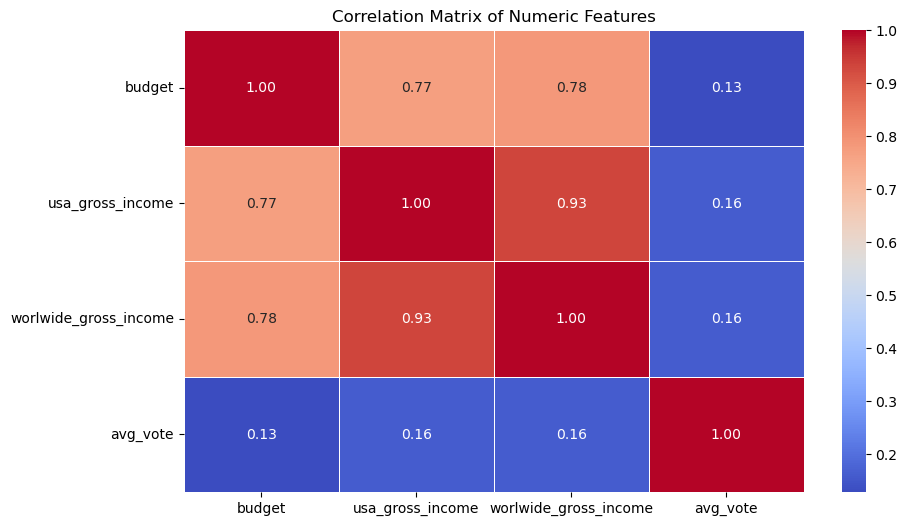

In [59]:
# Calculate the correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

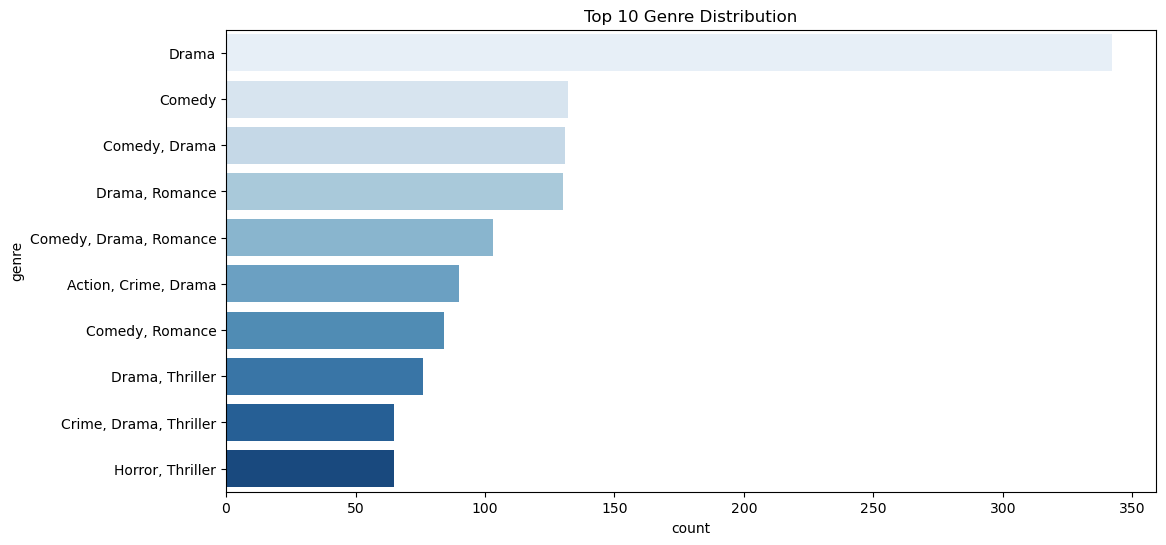

In [60]:
# Count plot for top 10 genre distribution
plt.figure(figsize=(12, 6))
top_10_genres = merged_df['genre'].value_counts().head(10).index  # Get top 10 genres
sns.countplot(y=merged_df['genre'], order=top_10_genres, palette=sns.color_palette("Blues", len(top_10_genres)))
plt.title('Top 10 Genre Distribution')
plt.show()

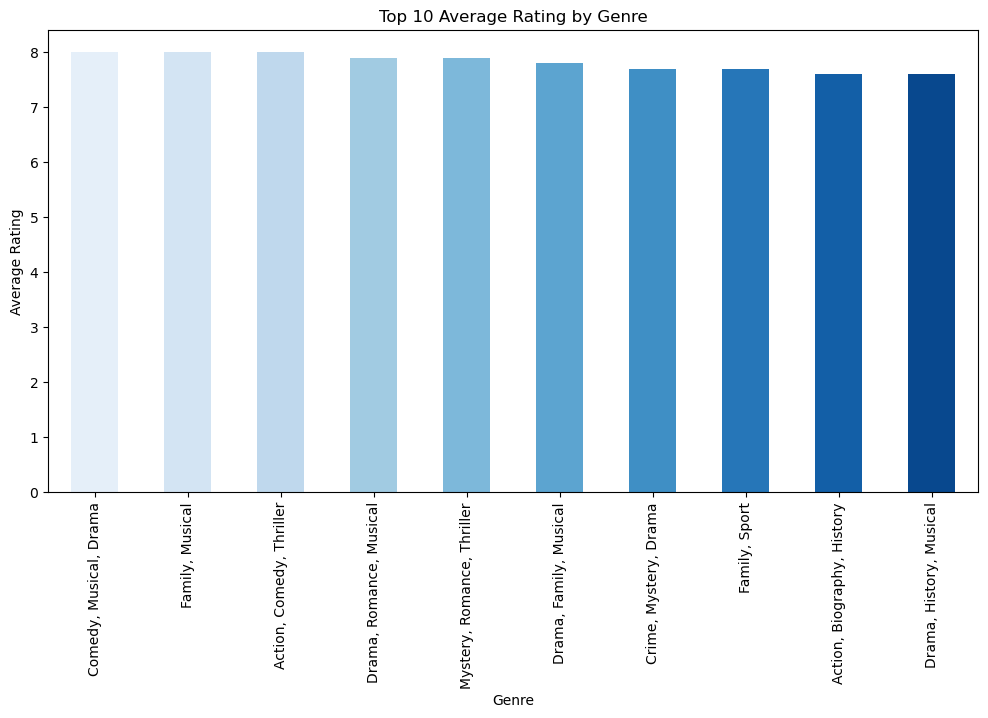

In [61]:
# Average rating by genre for top 10 genres with blue hues
plt.figure(figsize=(12, 6))
top_10_avg_rating_genre = merged_df.groupby('genre')['avg_vote'].mean().sort_values(ascending=False).head(10)
top_10_avg_rating_genre.plot(kind='bar', color=sns.color_palette("Blues", len(top_10_avg_rating_genre)))
plt.title('Top 10 Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

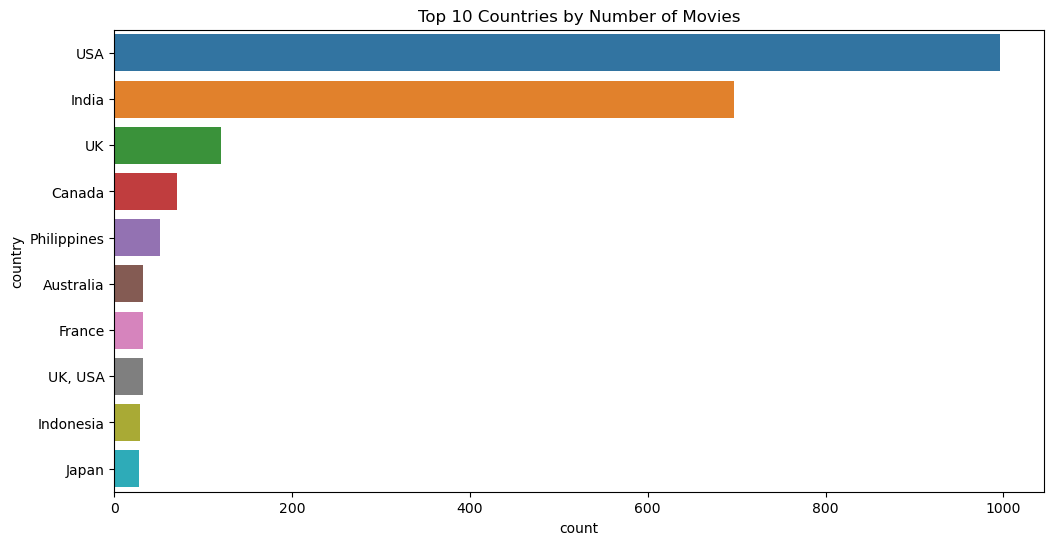

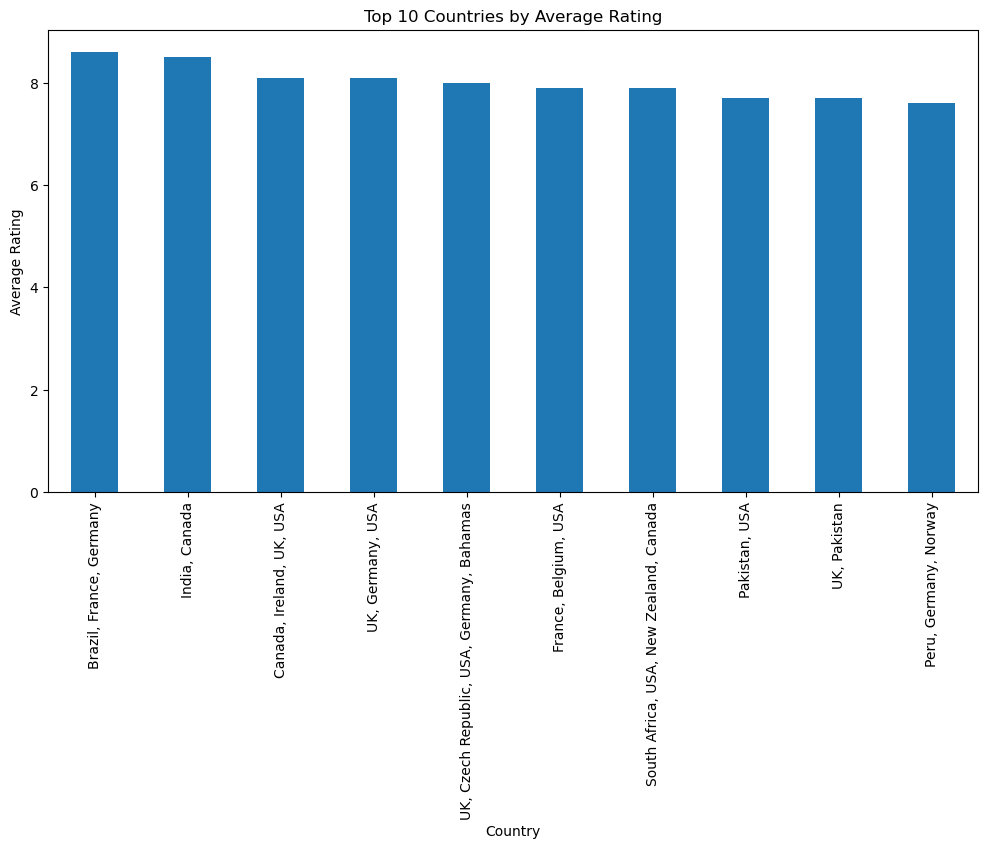

In [62]:
# Count plot for country distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_df['country'], order=merged_df['country'].value_counts().head(10).index)
plt.title('Top 10 Countries by Number of Movies')
plt.show()

# Average rating by country
plt.figure(figsize=(12, 6))
avg_rating_country = merged_df.groupby('country')['avg_vote'].mean().sort_values(ascending=False).head(10)
avg_rating_country.plot(kind='bar')
plt.title('Top 10 Countries by Average Rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()

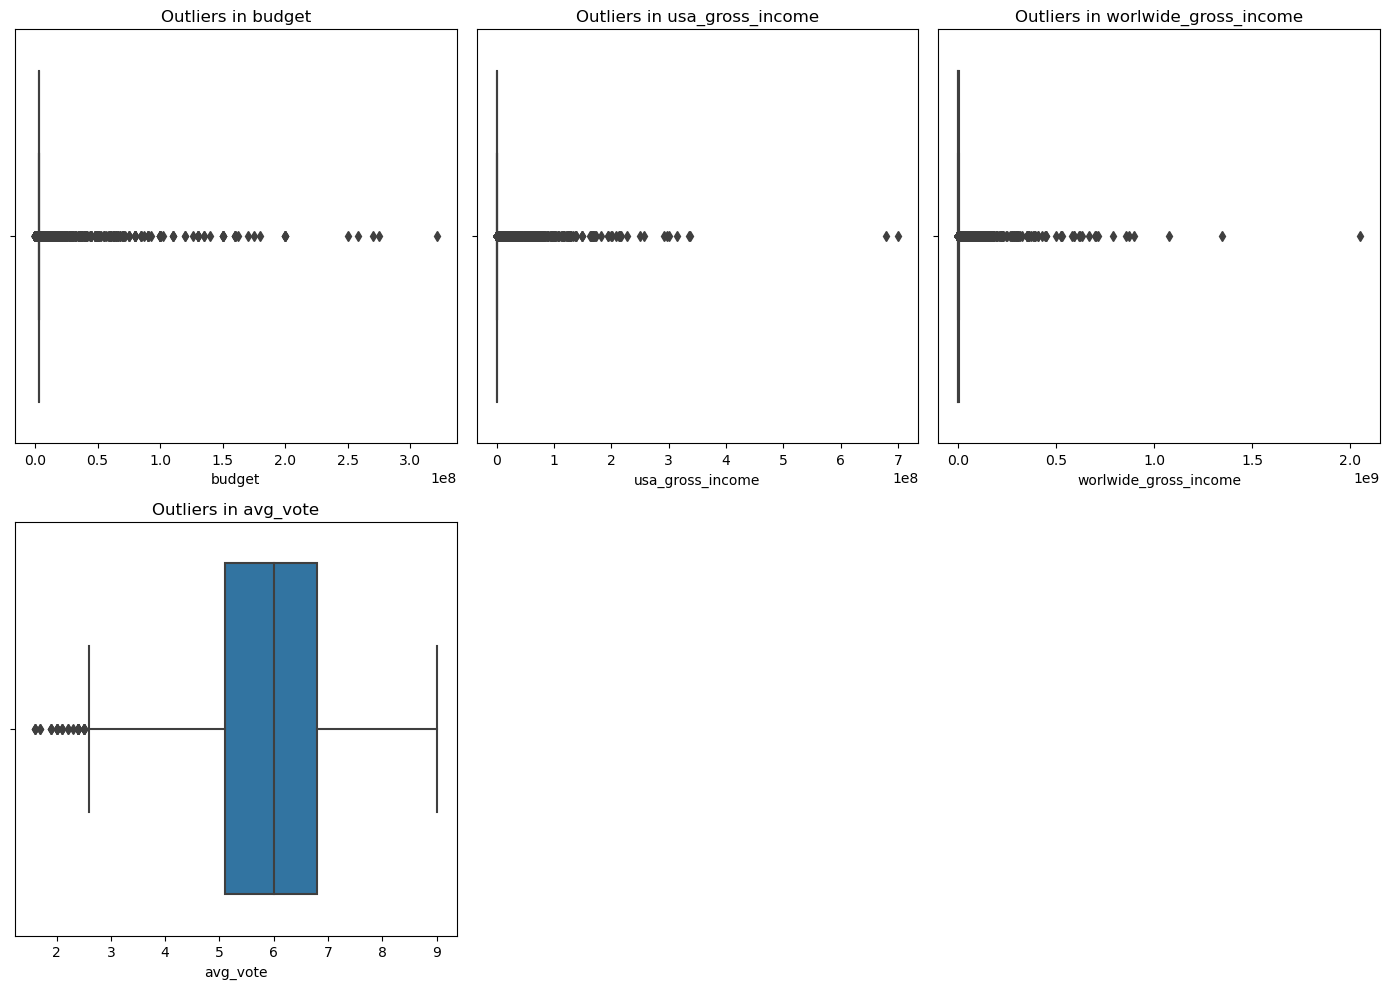

In [63]:
# Boxplots to identify outliers in numeric features
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=merged_df[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

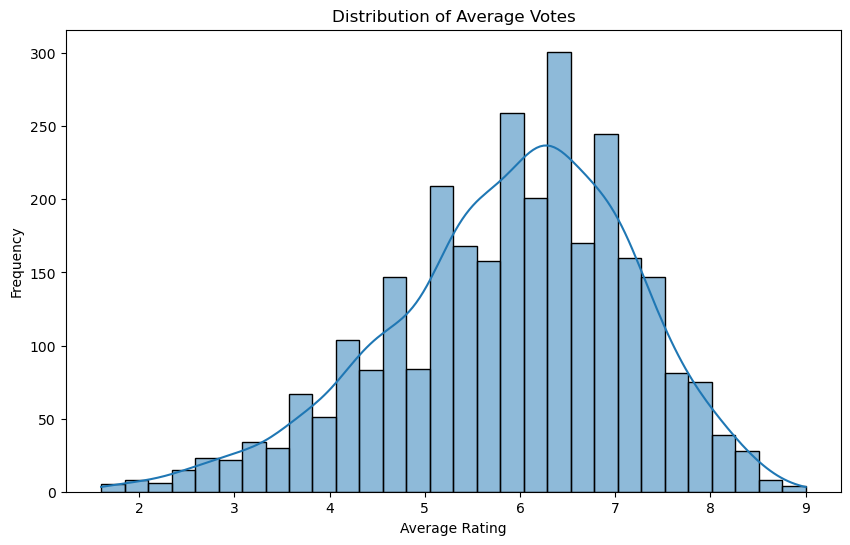

Percentage of Movies with Rating >= 8: 3.58%


In [64]:
# Plot the distribution of avg_vote (ratings)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['avg_vote'], kde=True, bins=30)
plt.title('Distribution of Average Votes')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Check the percentage of movies with high ratings (e.g., >= 8)
high_rated_movies = merged_df[merged_df['avg_vote'] >= 8]
print(f"Percentage of Movies with Rating >= 8: {len(high_rated_movies) / len(merged_df) * 100:.2f}%")

In [65]:
print(merged_df.columns)

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'duration_x',
       'listed_in', 'description_x', 'month_added', 'year_added',
       ...
       'actors', 'description_y', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object', length=13016)


In [66]:
print([col for col in merged_df.columns if '_x' in col or '_y' in col])

['release_year', 'duration_x', 'description_x', 'duration_y', 'description_y']


In [67]:
merged_df[['description_x', 'description_y']].sample(10)

,description_x,description_y
2797,"In a near-future world, single people are hunt...","In a dystopian near future, single people, acc..."
1433,A young artist falls for an aristocratic young...,Modern adaptation of Charles Dickens' Great Ex...
2573,Siddharth falls in love with beautiful Jhanvi....,When a law student accidentally kills the son ...
2691,A socially awkward Catholic schoolgirl vows to...,An arrogant movie star's life drastically chan...
203,Isolated on a wind-ravaged 19th-century homest...,An ancient wind carries with it omens of the a...
18,Status and strategy collide in this social exp...,A woman lands a dream job at a powerful tech c...
2799,Danish teen Emma moves to Paris hoping to beco...,"Emma, an emerging model, struggles to enter th..."
2518,A man and a woman struggling to keep their res...,"A man and a woman, both in strained marriages,..."
1042,Two mischievous boys get thrust into a game of...,A small-town sheriff sets out to find the two ...
1203,When Kak Limah turns up dead shortly after her...,Kak Limah is discovered dead by villager. Sinc...


In [68]:
merged_df.rename(columns={'description_x': 'description'}, inplace=True)
merged_df.drop(columns=['description_y'], inplace=True)

In [69]:
merged_df[['duration_x', 'duration_y']].sample(10)

,duration_x,duration_y
663,100.0,101
2236,103.0,89
2107,91.0,91
833,30.0,111
2690,82.0,120
460,139.0,139
1352,97.0,130
198,106.0,106
1879,142.0,151
864,120.0,119


In [70]:
merged_df.rename(columns={'duration_y': 'duration'}, inplace=True)
merged_df.drop(columns=['duration_x'], inplace=True)

In [71]:
print(merged_df.sample(10))

     show_id     type                 title           date_added  \
2607   s7981    Movie           Sen Kimsin?  2017-03-10 00:00:00   
2476   s7664    Movie        One Last Thing  2019-08-25 00:00:00   
2648   s8042    Movie             Slow West  2018-07-26 00:00:00   
2534   s7828    Movie  Ram Teri Ganga Maili  2019-12-31 00:00:00   
1561   s5009    Movie                  Guru  2018-03-01 00:00:00   
407    s1675    Movie             Bodyguard  2020-11-19 00:00:00   
491    s1989  TV Show         The Last Word  2020-09-17 00:00:00   
2482   s7682    Movie             OtherLife  2017-10-15 00:00:00   
530    s2078    Movie             The Match  2020-09-01 00:00:00   
2336   s7248    Movie             Kya Kehna  2018-04-01 00:00:00   

      release_year                                          listed_in  \
2607          2012                     Comedies, International Movies   
2476          2018                                             Dramas   
2648          2015   Action & Ad

In [72]:
print(merged_df.columns.tolist())

['show_id', 'type', 'title', 'date_added', 'release_year', 'listed_in', 'description', 'month_added', 'year_added', 'director_A. Raajdheep', 'director_A. Salaam', 'director_A.R. Murugadoss', 'director_Aadish Keluskar', 'director_Aamir Bashir', 'director_Aamir Khan', 'director_Aanand Rai', 'director_Aaron Burns', 'director_Aaron Hancox, Michael McNamara', 'director_Aaron Hann, Mario Miscione', 'director_Aaron Lieber', 'director_Aaron Nee, Adam Nee', 'director_Aaron Sorkin', 'director_Aaron Woodley', 'director_Aatmaram Dharne', 'director_Abba T. Makama', 'director_Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla', 'director_Abbas Mustan', 'director_Abbas Tyrewala', 'director_Abby Epstein', 'director_Abdellatif Kechiche', 'director_Abdul Aziz Hashad', 'director_Abdulaziz Alshlahei', 'director_Abel Ferrara', 'director_Abhay Chopra', 'director_Abhijeet Deshpande', 'director_Abhijit Kokate, Srivinay Salian', 'director_Abhijit Panse', 'director_Abhinay Deo', 'director_Abhishek Chaubey', 'd

In [106]:
merged_df.to_csv("merged_data.csv", index=False)

In [107]:
merged_df.to_csv("/Users/miriamgarcia/Desktop/NetflixRecommendationSystem/merged_data.csv", index=False)

# Feature Engineering



In [74]:
#Normalize/Scale Numerical Features
from sklearn.preprocessing import MinMaxScaler

# List of numerical features to scale
numeric_columns = ['budget', 'usa_gross_income', 'worlwide_gross_income', 'duration']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

# Check the transformed values
print(merged_df[numeric_columns].head())

     budget  usa_gross_income  worlwide_gross_income  duration
0  0.009346          0.001877               0.000541  0.248826
1  0.003115          0.003138               0.001074  0.375587
2  0.009346          0.006287               0.002262  0.295775
3  0.009346          0.001877               0.000541  0.507042
4  0.009346          0.001877               0.000541  0.610329


In [75]:
#Create new feautures from the textual data
# Sentiment analysis of movie descriptions (Basic sentiment polarity)
from textblob import TextBlob

# Create a new feature for sentiment polarity
merged_df['description_sentiment'] = merged_df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Length of description
merged_df['description_length'] = merged_df['description'].apply(lambda x: len(str(x).split()))

# Check the new features
print(merged_df[['description_sentiment', 'description_length']].head())

   description_sentiment  description_length
0               0.000000                  23
1              -0.083333                  28
2              -0.025000                  25
3               0.000000                  24
4               0.500000                  29


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=500)  # Limit features to avoid high dimensionality
description_tfidf = tfidf.fit_transform(merged_df['description'].fillna(''))

# Convert to DataFrame and merge
description_df = pd.DataFrame(description_tfidf.toarray(), columns=[f'desc_{i}' for i in range(description_tfidf.shape[1])])
merged_df = pd.concat([merged_df.reset_index(drop=True), description_df], axis=1)

# Drop original text column
merged_df.drop(columns=['description'], inplace=True)

# Check processed data
print(merged_df.head())

  show_id     type              title           date_added  release_year  \
0      s6  TV Show      Midnight Mass  2021-09-24 00:00:00          2021   
1      s8    Movie            Sankofa  2021-09-24 00:00:00          1993   
2     s16  TV Show  Dear White People  2021-09-22 00:00:00          2021   
3     s20  TV Show             Jaguar  2021-09-22 00:00:00          2021   
4     s25    Movie              Jeans  2021-09-21 00:00:00          1998   

                                           listed_in  month_added  year_added  \
0                 TV Dramas, TV Horror, TV Mysteries          9.0      2021.0   
1   Dramas, Independent Movies, International Movies          9.0      2021.0   
2                             TV Comedies, TV Dramas          9.0      2021.0   
3  International TV Shows, Spanish-Language TV Sh...          9.0      2021.0   
4    Comedies, International Movies, Romantic Movies          9.0      2021.0   

   director_A. Raajdheep  director_A. Salaam  ...  desc_

In [78]:
#Selecting numeric columns and scaling
from sklearn.preprocessing import MinMaxScaler

# List of numerical features
numeric_columns = ['budget', 'usa_gross_income', 'worlwide_gross_income', 'duration']  

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numeric columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

# Verify
print(merged_df[numeric_columns].head())

     budget  usa_gross_income  worlwide_gross_income  duration
0  0.009346          0.001877               0.000541  0.248826
1  0.003115          0.003138               0.001074  0.375587
2  0.009346          0.006287               0.002262  0.295775
3  0.009346          0.001877               0.000541  0.507042
4  0.009346          0.001877               0.000541  0.610329


In [79]:
# Drop non-useful or duplicate columns
merged_df.drop(columns=['show_id', 'title', 'original_title', 'date_added'], inplace=True, errors='ignore')

# Check final shape
print(f"Final dataset shape: {merged_df.shape}")

Final dataset shape: (2932, 13511)


# Model Building

In [94]:
# Define target and features
y = imdb_df['avg_vote']  # Assuming avg_vote is the rating column in imdb_df
X = imdb_df.drop(columns=['avg_vote', 'imdb_title_id', 'title', 'original_title'])  # Drop non-predictive columns

In [95]:
# Fill missing values for numerical columns
X.fillna(X.median(), inplace=True)

# Check for any missing values
print(X.isnull().sum())

year                     0
date_published           0
genre                    0
duration                 0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                   0
description              0
votes                    0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
metascore                0
reviews_from_users       0
reviews_from_critics     0
dtype: int64


/var/folders/1v/lzq6943n6q9327g_lkz22xhc0000gn/T/ipykernel_42713/826722313.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.median(), inplace=True)


In [96]:
# One-hot encode categorical columns like 'genre', 'director', etc.
X = pd.get_dummies(X, drop_first=True)

In [91]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numeric columns
X_scaled = scaler.fit_transform(X)

In [98]:
print(X.dtypes)

duration                                                                                                                                                                                                                                                      int64
votes                                                                                                                                                                                                                                                         int64
budget                                                                                                                                                                                                                                                      float64
usa_gross_income                                                                                                                                                                                                            

In [101]:
print(merged_df.columns)
# Check for the presence of the 'cast' column and handle it
if 'cast' in merged_df.columns:
    merged_df['cast'] = merged_df['cast'].str.split(',')
else:
    print("'cast' column not found")

Index(['release_year', 'listed_in', 'month_added', 'year_added',
       'director_A. Raajdheep', 'director_A. Salaam',
       'director_A.R. Murugadoss', 'director_Aadish Keluskar',
       'director_Aamir Bashir', 'director_Aamir Khan',
       ...
       'desc_491', 'desc_492', 'desc_493', 'desc_494', 'desc_495', 'desc_496',
       'desc_497', 'desc_498', 'desc_499', 'type_TV Show'],
      dtype='object', length=13511)
'cast' column not found


In [102]:
# Split multi-category values in the 'genre' column
merged_df['genre'] = merged_df['genre'].str.split(',')

# Alternatively, if other columns are similar, apply the same logic
# For example, 'cast' or 'country' columns
merged_df['country'] = merged_df['country'].str.split(',')
merged_df['cast'] = merged_df['cast'].str.split(',')

KeyError: 'cast'

Linear Regression Model

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

ValueError: could not convert string to float: 'International TV Shows, Romantic TV Shows, Spanish-Language TV Shows'

Random Forest Model

In [83]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Mean Absolute Error (Random Forest): {mae_rf}")
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R^2 Score (Random Forest): {r2_rf}")

ValueError: could not convert string to float: 'TV Show'

A/B Testing Framework

In [ ]:
#Compare Linear Regression vs. Random Forest.

# Create two random splits (for testing purposes)
X_train_a, X_train_b, y_train_a, y_train_b = train_test_split(X, y, test_size=0.5, random_state=42)

# Train both models on different splits
model_a = LinearRegression()
model_b = RandomForestRegressor(n_estimators=100, random_state=42)

model_a.fit(X_train_a, y_train_a)
model_b.fit(X_train_b, y_train_b)

# Evaluate each model
y_pred_a = model_a.predict(X_test)
y_pred_b = model_b.predict(X_test)

# Compare performance using R^2
r2_a = r2_score(y_test, y_pred_a)
r2_b = r2_score(y_test, y_pred_b)

print(f"R^2 Score for Linear Regression: {r2_a}")
print(f"R^2 Score for Random Forest: {r2_b}")

# Model Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")